In [ ]:
### Code contains analysis for Figure 3 and Extended Data Figure 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import ma_codes as codes
from ma_codes import mysize, gray_red, mymap
import pertpy as pt
%matplotlib inline
import math
from matplotlib_venn import venn2  


sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

import warnings
warnings.filterwarnings("ignore")

Running Scanpy 1.10.2, on 2025-04-23 12:44.


In [2]:
plot_folder = "/home/gotej/Projects/Aging_BleoModel/Plots/"
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42

In [3]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "240812_BleoAging_Alveolum_final.h5ad") 

### Targeted (Alveolar Circuit)

In [5]:
file_path_young_targeted = "/media/HDD_1/Michael/aging/NicheNet/output/targeted/young_mice/"
file_path_old_targeted = "/media/HDD_1/Michael/aging/NicheNet/output/targeted/old_mice/"

fib_d3_old_tar = pd.read_csv(file_path_old_targeted + "bleo_Myofibroblasts_d3_reg_potential_old.txt", sep="\t")
fib_d10_old_tar  = pd.read_csv(file_path_old_targeted + "bleo_Myofibroblasts_d10_reg_potential_old.txt", sep="\t")
fib_d20_old_tar  = pd.read_csv(file_path_old_targeted + "bleo_Myofibroblasts_d20_reg_potential_old.txt", sep="\t")
fib_d30_old_tar  = pd.read_csv(file_path_old_targeted + "bleo_Myofibroblasts_d30_reg_potential_old.txt", sep="\t")
fib_d37_old_tar  = pd.read_csv(file_path_old_targeted + "bleo_Myofibroblasts_d37_reg_potential_old.txt", sep="\t")

fib_d3_young_tar = pd.read_csv(file_path_young_targeted + "bleo_Myofibroblasts_d3_reg_potential_young.txt", sep="\t")
fib_d10_young_tar  = pd.read_csv(file_path_young_targeted + "bleo_Myofibroblasts_d10_reg_potential_young.txt", sep="\t")
fib_d20_young_tar  = pd.read_csv(file_path_young_targeted + "bleo_Myofibroblasts_d20_reg_potential_young.txt", sep="\t")
fib_d30_young_tar  = pd.read_csv(file_path_young_targeted + "bleo_Myofibroblasts_d30_reg_potential_young.txt", sep="\t")
fib_d37_young_tar  = pd.read_csv(file_path_young_targeted + "bleo_Myofibroblasts_d37_reg_potential_young.txt", sep="\t")

fib_d3_old_tar.set_index(["test_ligand"], inplace=True)
fib_d10_old_tar.set_index(["test_ligand"], inplace=True)
fib_d20_old_tar.set_index(["test_ligand"], inplace=True)
fib_d30_old_tar.set_index(["test_ligand"], inplace=True)
fib_d37_old_tar.set_index(["test_ligand"], inplace=True)

fib_d3_young_tar.set_index(["test_ligand"], inplace=True)
fib_d10_young_tar.set_index(["test_ligand"], inplace=True)
fib_d20_young_tar.set_index(["test_ligand"], inplace=True)
fib_d30_young_tar.set_index(["test_ligand"], inplace=True)
fib_d37_young_tar.set_index(["test_ligand"], inplace=True)


lig_d37_young_tar = fib_d37_young_tar.index.tolist()
lig_d37_old_tar = fib_d37_old_tar.index.tolist()

In [6]:
### Merge into 1 dataframe
merged_fib_tar_old = fib_d3_old_tar.merge(fib_d10_old_tar, on='test_ligand', how='outer', suffixes=('_d3', '_d10')) \
                                       .merge(fib_d20_old_tar, on='test_ligand', how='outer') \
                                       .merge(fib_d30_old_tar, on='test_ligand', how='outer', suffixes=('', '_d30')) \
                                       .merge(fib_d37_old_tar, on='test_ligand', how='outer', suffixes=('', '_d37'))
merged_fib_tar_old = merged_fib_tar_old.rename(columns=lambda col: f"{col}_d20" if col in fib_d20_old_tar.columns and col != 'test_ligand' else col)
merged_fib_tar_old.head()

,auroc_d3,aupr_d3,aupr_corrected_d3,pearson_d3,rank_d3,expressed_in_d3,upregulated_in_d3,auroc_d10,aupr_d10,aupr_corrected_d10,...,rank_d30,expressed_in_d30,upregulated_in_d30,auroc_d37,aupr_d37,aupr_corrected_d37,pearson_d37,rank_d37,expressed_in_d37,upregulated_in_d37
test_ligand,,,,,,,,,,,,,,,,,,,,,
Adam12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,Myofibroblasts,Myofibroblasts,0.667528,0.072106,0.031178,0.107075,22.0,Myofibroblasts,Myofibroblasts
Adam17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683691,0.050679,0.024066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam9,0.517267,0.057990,0.004697,0.016422,39.0,"AT1, Myofibroblasts",NaN,0.664604,0.054773,0.028160,...,28.0,"AT1, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.662672,0.077655,0.036726,0.112578,15.0,"AT1, Krt8-ADI, Myofibroblasts",Krt8-ADI
Agrn,0.549543,0.066579,0.013286,0.044985,2.0,"AT1, AT2_activated, Krt8-ADI","AT2_activated, Krt8-ADI",0.626160,0.040081,0.013467,...,106.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.602640,0.053106,0.012178,0.056135,102.0,"AT1, AT2_activated, Krt8-ADI",Krt8-ADI
Aimp1,0.491909,0.052234,-0.001058,-0.005069,83.0,"AT1, Krt8-ADI, Myofibroblasts",NaN,0.661239,0.049014,0.022401,...,86.0,"Krt8-ADI, Myofibroblasts",NaN,0.640837,0.063865,0.022936,0.080753,78.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",NaN


In [7]:
merged_fib_tar_young = fib_d3_young_tar.merge(fib_d10_young_tar, on='test_ligand', how='outer', suffixes=('_d3', '_d10')) \
                                       .merge(fib_d20_young_tar, on='test_ligand', how='outer') \
                                       .merge(fib_d30_young_tar, on='test_ligand', how='outer', suffixes=('', '_d30')) \
                                       .merge(fib_d37_young_tar, on='test_ligand', how='outer', suffixes=('', '_d37'))
merged_fib_tar_young = merged_fib_tar_young.rename(columns=lambda col: f"{col}_d20" if col in fib_d20_young_tar.columns and col != 'test_ligand' else col)
merged_fib_tar_young.head()

,auroc_d3,aupr_d3,aupr_corrected_d3,pearson_d3,rank_d3,expressed_in_d3,upregulated_in_d3,auroc_d10,aupr_d10,aupr_corrected_d10,...,rank_d30,expressed_in_d30,upregulated_in_d30,auroc_d37,aupr_d37,aupr_corrected_d37,pearson_d37,rank_d37,expressed_in_d37,upregulated_in_d37
test_ligand,,,,,,,,,,,,,,,,,,,,,
Adam12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579528,0.204504,0.059430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam17,0.680943,0.068618,0.040530,0.126026,2.0,Myofibroblasts,NaN,NaN,NaN,NaN,...,32.0,Myofibroblasts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam9,0.623714,0.047789,0.019701,0.075545,72.0,"AT1, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.580841,0.214532,0.069458,...,21.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts","AT2_activated, Krt8-ADI",0.652138,0.112087,0.050347,0.137719,12.0,Myofibroblasts,NaN
Agrn,0.608606,0.044053,0.015965,0.066448,83.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts","AT2_activated, Krt8-ADI",0.571043,0.193658,0.048584,...,93.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.625602,0.092703,0.030963,0.103612,64.0,"AT1, AT2_activated, Krt8-ADI",Krt8-ADI
Aimp1,0.612078,0.044488,0.016399,0.063392,87.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.582485,0.204683,0.059609,...,76.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",NaN,0.642918,0.101534,0.039795,0.116876,52.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",Krt8-ADI


#### Venn diagram young vs old d37

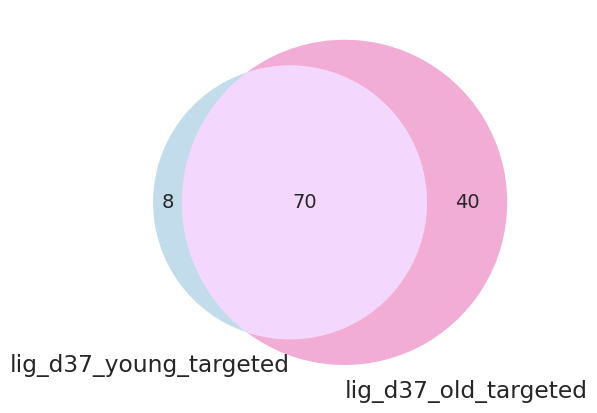

In [8]:
venn2(subsets = (set(lig_d37_young_tar), set(lig_d37_old_tar)), set_labels = ('lig_d37_young_targeted', 'lig_d37_old_targeted'), 
      set_colors=("#67a9cf", "#dd3497")) 
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" +"_Venn_fibroblast_activating_ligands_young_vs_old_day37_targeted.pdf")
plt.show()

In [9]:
unique_young_tar = list(set(lig_d37_young_tar) - set(lig_d37_old_tar))
unique_old_tar= list(set(lig_d37_old_tar) - set(lig_d37_young_tar))
print(unique_young_tar)
print(unique_old_tar)

['Flrt3', 'Penk', 'Celsr1', 'Lif', 'Cmtm6', 'Bmp2', 'Grn', 'Gpi1']
['Areg', 'Tfpi', 'Psen1', 'Shh', 'Robo2', 'Fgf2', 'Mif', 'Ceacam1', 'Hmgb2', 'Ocln', 'Nrg1', 'Gdnf', 'Edn3', 'Adam12', 'Alcam', 'Wnt7b', 'Plxnb2', 'Ereg', 'Cadm1', 'Dkk2', 'Vegfb', 'Icam1', 'Ptgs2', 'Efna1', 'Il33', 'Sema3a', 'Ptn', 'Gas6', 'Nptn', 'Dsg2', 'Cmtm8', 'Fgf7', 'Cxcl12', 'Lgals3', 'Pvr', 'Ncam1', 'Nectin1', 'Bdnf', 'Ntn4', 'Cd320']


In [10]:
#### Heatmap targeted

In [11]:
merged_fib_tar = merged_fib_tar_young.merge(merged_fib_tar_old, on='test_ligand', how='outer', suffixes=('_young', '_old'))
merged_fib_tar.head()

,auroc_d3_young,aupr_d3_young,aupr_corrected_d3_young,pearson_d3_young,rank_d3_young,expressed_in_d3_young,upregulated_in_d3_young,auroc_d10_young,aupr_d10_young,aupr_corrected_d10_young,...,rank_d30_old,expressed_in_d30_old,upregulated_in_d30_old,auroc_d37_old,aupr_d37_old,aupr_corrected_d37_old,pearson_d37_old,rank_d37_old,expressed_in_d37_old,upregulated_in_d37_old
test_ligand,,,,,,,,,,,,,,,,,,,,,
Adam12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579528,0.204504,0.059430,...,25.0,Myofibroblasts,Myofibroblasts,0.667528,0.072106,0.031178,0.107075,22.0,Myofibroblasts,Myofibroblasts
Adam17,0.680943,0.068618,0.040530,0.126026,2.0,Myofibroblasts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam9,0.623714,0.047789,0.019701,0.075545,72.0,"AT1, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.580841,0.214532,0.069458,...,28.0,"AT1, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.662672,0.077655,0.036726,0.112578,15.0,"AT1, Krt8-ADI, Myofibroblasts",Krt8-ADI
Agrn,0.608606,0.044053,0.015965,0.066448,83.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts","AT2_activated, Krt8-ADI",0.571043,0.193658,0.048584,...,106.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.602640,0.053106,0.012178,0.056135,102.0,"AT1, AT2_activated, Krt8-ADI",Krt8-ADI
Aimp1,0.612078,0.044488,0.016399,0.063392,87.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",Krt8-ADI,0.582485,0.204683,0.059609,...,86.0,"Krt8-ADI, Myofibroblasts",NaN,0.640837,0.063865,0.022936,0.080753,78.0,"AT1, AT2_activated, Krt8-ADI, Myofibroblasts",NaN


In [12]:
merged_fib_tar_hm = merged_fib_tar[['pearson_d3_young', 'pearson_d10_young', 'pearson_d20_young','pearson_d30_young', 'pearson_d37_young', 
                                    'pearson_d3_old', 'pearson_d10_old', 'pearson_d20_old', 'pearson_d30_old', 'pearson_d37_old']]
merged_fib_tar_hm.head()
merged_fib_tar_hm.fillna(0, inplace=True)

#### Average Expression in Alveolum

In [13]:
unique_combined_targeted = unique_old_tar + unique_young_tar
# remove ligands not expressed in alveolum but only myofibroblasts: 
unique_combined_targeted_alv = list(set(unique_combined_targeted) - set(['Adam12', 'Fgf2', 'Grn', 'Ncam1', 'Penk', 'Tfpi', 'Fgf7']))

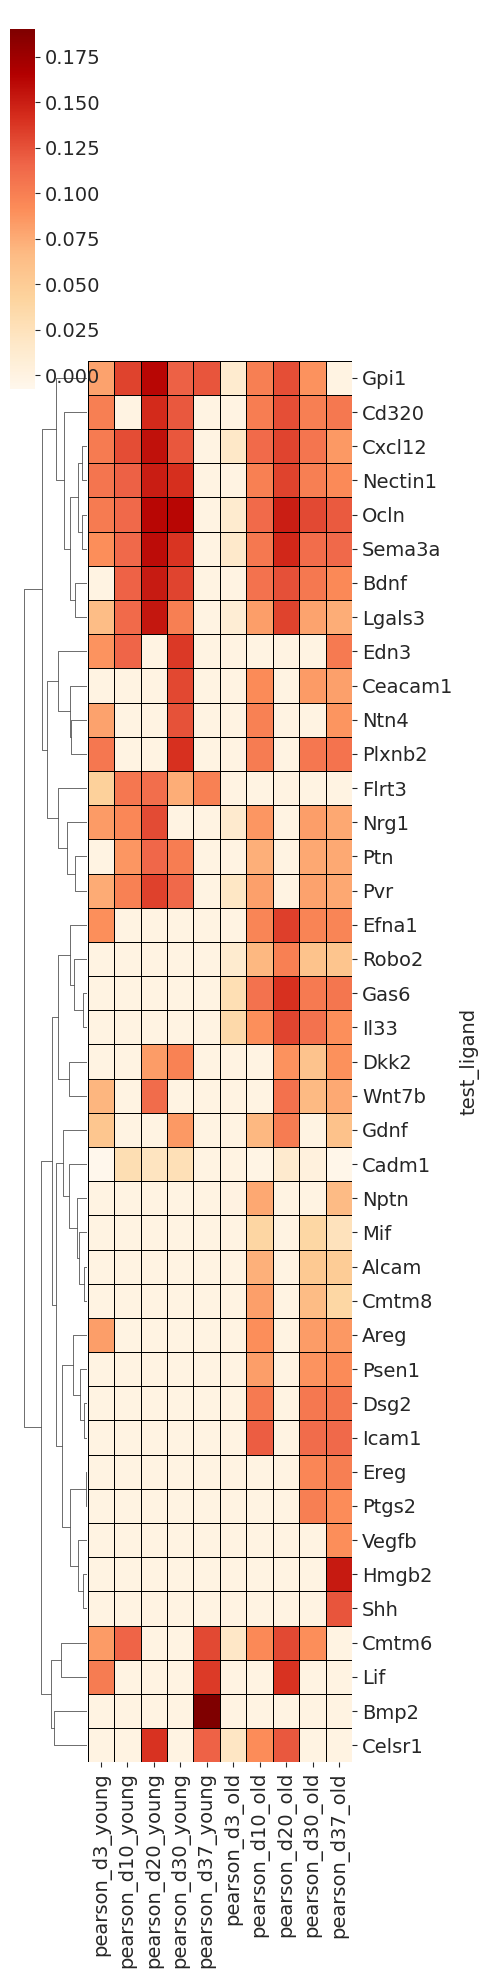

In [14]:
merged_fib_tar_hm_unique_alv = merged_fib_tar.loc[merged_fib_tar.index.isin(unique_combined_targeted_alv)]
merged_fib_tar_hm_unique_alv.head()
merged_fib_tar_hm_unique_alv = merged_fib_tar_hm_unique_alv [['pearson_d3_young', 'pearson_d10_young', 'pearson_d20_young','pearson_d30_young', 
                                                              'pearson_d37_young', 'pearson_d3_old', 'pearson_d10_old', 'pearson_d20_old', 
                                                              'pearson_d30_old', 'pearson_d37_old']]
merged_fib_tar_hm_unique_alv.fillna(0, inplace=True)
clustermap = sb.clustermap(merged_fib_tar_hm_unique_alv,linewidths=0.5, linecolor="black", cmap="OrRd", method='complete', metric='euclidean', 
              z_score=None, standard_scale=None, figsize=(5, 20), cbar_kws=None, 
              row_cluster=True, col_cluster=False, row_linkage=None, col_linkage=None)
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" +"_Heatmap_NicheNet_scores_young_and_old_targeted_only_alveolum.pdf")

In [15]:
row_order = clustermap.dendrogram_row.reordered_ind
row_labels = merged_fib_tar_hm_unique_alv.index[row_order]

# Print the order
print("Row order:", row_labels)

Row order: Index(['Gpi1', 'Cd320', 'Cxcl12', 'Nectin1', 'Ocln', 'Sema3a', 'Bdnf',
       'Lgals3', 'Edn3', 'Ceacam1', 'Ntn4', 'Plxnb2', 'Flrt3', 'Nrg1', 'Ptn',
       'Pvr', 'Efna1', 'Robo2', 'Gas6', 'Il33', 'Dkk2', 'Wnt7b', 'Gdnf',
       'Cadm1', 'Nptn', 'Mif', 'Alcam', 'Cmtm8', 'Areg', 'Psen1', 'Dsg2',
       'Icam1', 'Ereg', 'Ptgs2', 'Vegfb', 'Hmgb2', 'Shh', 'Cmtm6', 'Lif',
       'Bmp2', 'Celsr1'],
      dtype='object', name='test_ligand')


In [16]:
unique_combined_targeted_alv = ['Gpi1', 'Cd320', 'Cxcl12', 'Nectin1', 'Ocln', 'Sema3a', 'Bdnf',
                                'Lgals3', 'Edn3', 'Ceacam1', 'Ntn4', 'Plxnb2', 'Flrt3', 'Nrg1', 'Ptn',
                                'Pvr', 'Efna1', 'Robo2', 'Gas6', 'Il33', 'Dkk2', 'Wnt7b', 'Gdnf',
                                'Cadm1', 'Nptn', 'Mif', 'Alcam', 'Cmtm8', 'Areg', 'Psen1', 'Dsg2',
                                'Icam1', 'Ereg', 'Ptgs2', 'Vegfb', 'Hmgb2', 'Shh', 'Cmtm6', 'Lif',
                                'Bmp2', 'Celsr1']

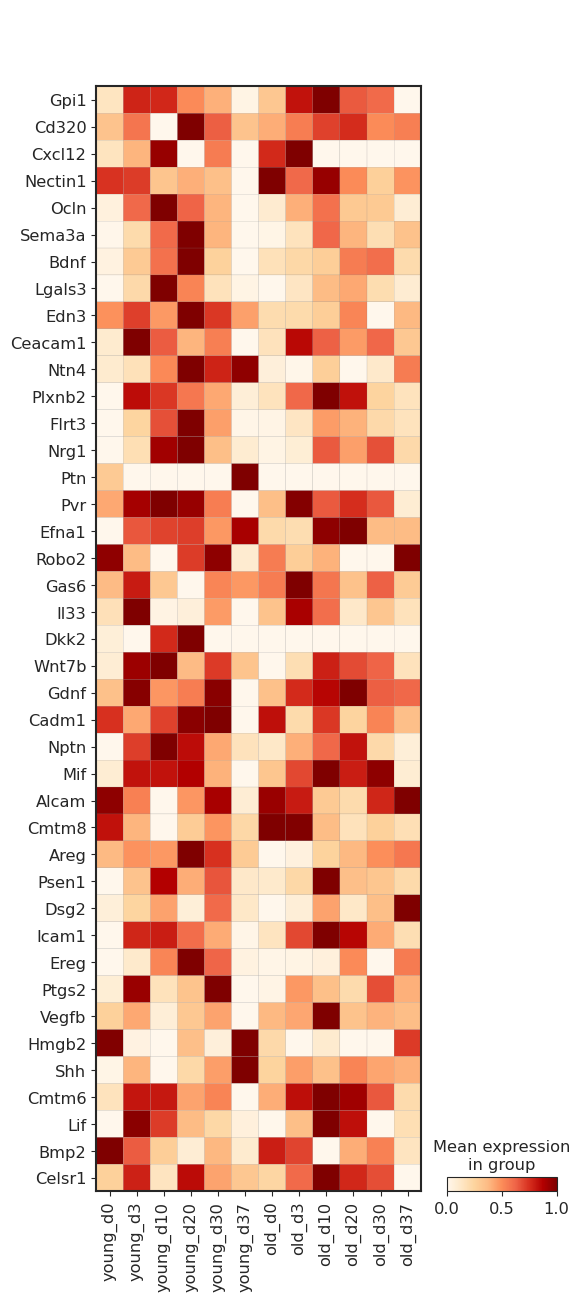

In [17]:
sc.pl.matrixplot(adata, groupby="age_day", var_names = unique_combined_targeted_alv, 
                 standard_scale="var", swap_axes=True, cmap="OrRd", save="_NicheNet_ligands_overtime_alveolar_expression.pdf")

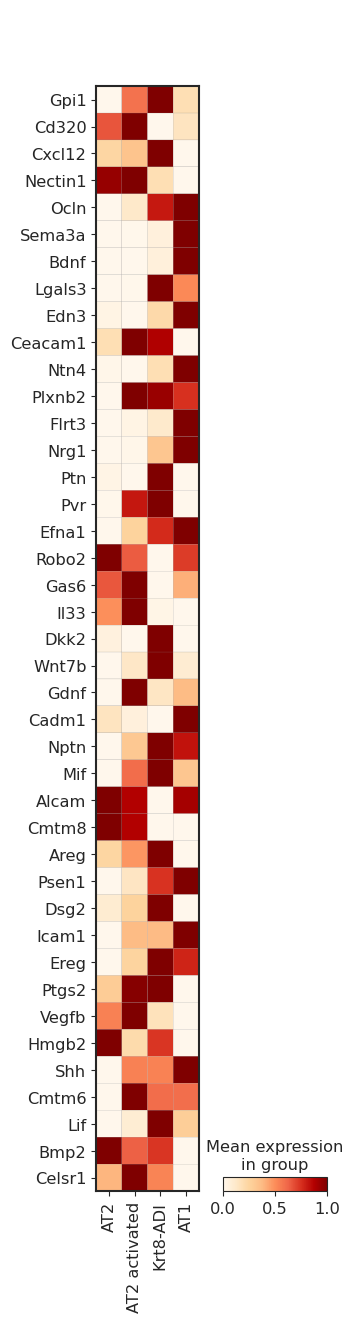

In [18]:
sc.pl.matrixplot(adata, groupby="cell_type", var_names = unique_combined_targeted_alv, 
                 standard_scale="var", swap_axes=True, cmap="OrRd", save="_NicheNet_ligands_ct_alveolar_expression.pdf")